In [1]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
import sys

In [2]:
path = '../statistics/'
sys.path.insert(0, path)
import stat_functions as stat_funct

#### Sample Linear Fit

- using get_lin_params function

In [3]:
# Gives help / description of function being called (here the function being called from stat_functions.py is 'get_lin_params')
help(stat_funct.get_lin_params) 

Help on function get_lin_params in module stat_functions:

get_lin_params(x, y)
    Fits a linear polynomial to the given x and y data points and calculates the Pearson correlation coefficient as well as its p-value.
    Utilizies numpy and scipy.stats for calculating Pearson correlation. 
    
    Parameters:
    x (array-like): x data points.
    y (array-like): y data points corresponding to x.
    
    Returns:
    xp (np.ndarray): 100 evenly spaced x values covering the original range of x.
    p (np.poly1d): Polynomial object which evaluates the polynomial using the fitted coefficients.
    Rval (float): Pearson's correlation coefficient indicating the linear relationship strength.
    pval (float): Two-tailed p-value for a hypothesis test whose null hypothesis is that the slope is zero.



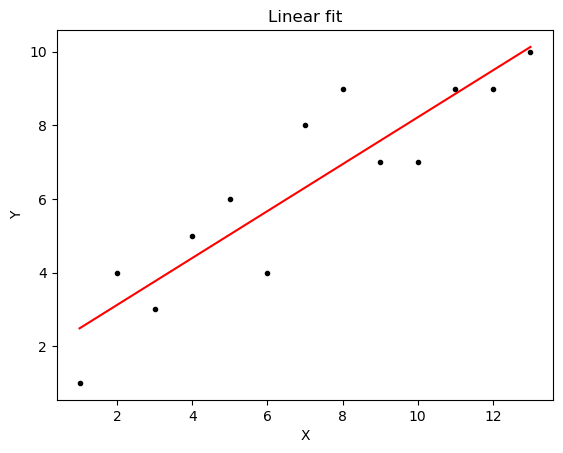

In [4]:
## test of linear fit
x_test = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
y_test = np.array([1,4,3,5,6,4,8,9,7,7,9,9,10])

# Assign/save: xp, p, Rval and pval that are returned from function 
xp,p, Rval, Pval = stat_funct.get_lin_params(x_test, y_test)

fig,ax = plt.subplots()
# Plots test data 
plt.scatter(x_test ,y_test, marker ='.',c='k')
# Plots best fit linear line obtained from function 
plt.xlabel('X'), plt.ylabel('Y')
plt.title('Linear fit')
plt.plot(xp,p(xp),c='red')
plt.show()

In [5]:
# Statistics on the linear fit
print("R val: ", "{:.4f}".format(Rval), "\n", "p-val: ", "{:.4f}".format(Pval))

R val:  0.9025 
 p-val:  0.0000


### Bootstrap Resampling

- add description of what boostrapping is and how it works

In [6]:
help(stat_funct.bootstrap_linear_fit)

Help on function bootstrap_linear_fit in module stat_functions:

bootstrap_linear_fit(x, y, n_bootstrap=10000, standard_devs=2)
    Performs bootstrap resampling to estimate the uncertainty in linear polynomial fitting parameters,
    along with the uncertainty in the Pearson correlation coefficient and its p-value, over multiple
    samples drawn with replacement.
    Utilizes 'get_lin_params' function to fit models and calculate statistics for each bootstrap sample. 
    
    Parameters:
    x (array-like): x data points.
    y (array-like): y data points corresponding to x.
    n_bootstrap (int, optional): Number of bootstrap samples to generate. Default is 10,000.
    standard_dev (int, optional): Number of standard deviations that should be returned for plotting error envelope. 
    
    Returns:
    xp (np.ndarray): 100 evenly spaced x values covering the original range of x.
    lower_lim (np.ndarray): The lower limit *standard_devs away from the mean of the returned points. 
  

In [7]:
# Perform bootstrap
xp, lowerlim, upperlim, rvals_stat, pvals_stat, fits = stat_funct.bootstrap_linear_fit(x_test, y_test, 10_000, 2)

In [8]:
# Print statistics 
print("mean rval: ", "{:.3f}".format(rvals_stat[1]), "\t", "std rval: ", "{:.3f}".format(rvals_stat[0]), "\n", "mean pval: ", "{:.3f}".format(pvals_stat[1]), "\t", "std pval: ", "{:.3f}".format(pvals_stat[0]) )

mean rval:  0.898 	 std rval:  0.050 
 mean pval:  0.000 	 std pval:  0.005


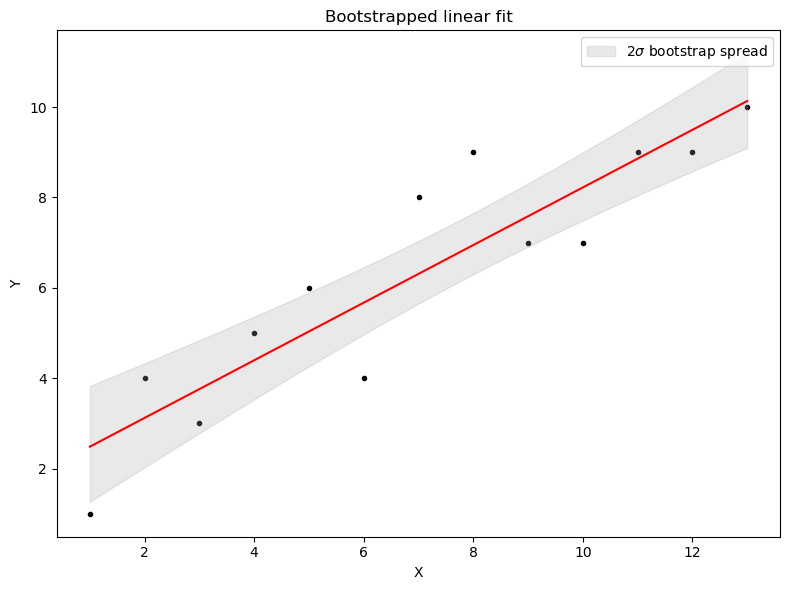

In [9]:
# Plot bootstrapped data with linear fit and error envelope
fig, ax = plt.subplots(1, 1,figsize=(8,6),tight_layout = True)
    
im = ax.scatter(x_test, y_test, marker='.',c='k')
ax.plot(xp, p(xp), c='red')
plt.xlabel('X'), plt.ylabel('Y')
# Add error envelope
ax.fill_between(xp, upperlim, lowerlim, color='darkgrey', alpha=0.25, label = '2$\sigma$ bootstrap spread')
plt.title('Bootstrapped linear fit')
plt.legend()

plt.show()

In [10]:
# Statistics on the linear fit
print("mean rval: ", "{:.3f}".format(rvals_stat[1]), "\t", "std rval: ", "{:.3f}".format(rvals_stat[0]), "\n", "mean pval: ", "{:.3f}".format(pvals_stat[1]), "\t", "std pval: ", "{:.3f}".format(pvals_stat[0]) )

mean rval:  0.898 	 std rval:  0.050 
 mean pval:  0.000 	 std pval:  0.005


### Jackknife Resampling

- add description on Jackknife resampling

In [11]:
help(stat_funct.jackknife_linear_fit)

Help on function jackknife_linear_fit in module stat_functions:

jackknife_linear_fit(x, y, standard_devs=2)
    Performs jackknife resampling to estimate the uncertainty in the parameters of a linear fit,
    as well as the Pearson correlation coefficient and its p-value, by systematically omitting
    one data point at a time from the dataset.
    Utilizes 'get_lin_params' function to fit linear models to the jackknife samples. 
    
    Parameters:
    x (array-like): x data points.
    y (array-like): y data points corresponding to x.
    standard_devs (int, optional): Number of standard deviations that should be returned for plotting error envelope. 
    
    Returns:
    xp (np.ndarray): 100 evenly spaced x values covering the original range of x.
    lower_lim (numpy.ndarray): Lower boundary of the error envelope for the fitted polynomial at each point in xp.
    upper_lim (numpy.ndarray): Upper boundary of the error envelope for the fitted polynomial at each point in xp.
    rv

In [12]:
# Perform jackknife 
xp, jack_lowerlim, jack_upperlim, jack_rvals, jack_pvals, jack_fits = stat_funct.jackknife_linear_fit(x_test, y_test, standard_devs=3)

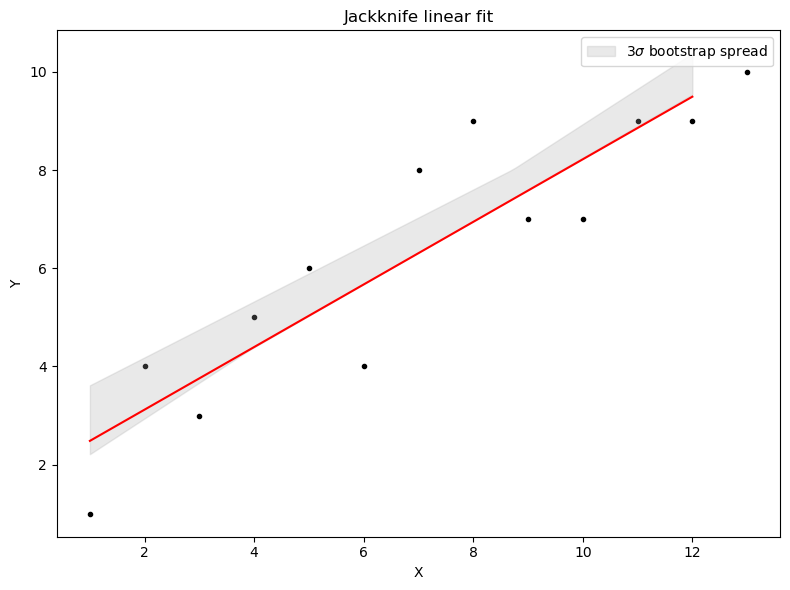

In [15]:
# Plot bootstrapped data with linear fit and error envelope
fig, ax = plt.subplots(1, 1,figsize=(8,6),tight_layout = True)
    
im = ax.scatter(x_test, y_test, marker='.',c='k')
ax.plot(xp, p(xp), c='red')
plt.xlabel('X'), plt.ylabel('Y')
# Add error envelope
ax.fill_between(xp, jack_upperlim, jack_lowerlim, color='darkgrey', alpha=0.25, label = '3$\sigma$ bootstrap spread')
plt.title('Jackknife linear fit')
plt.legend()

plt.show()

In [ ]:
# There seems to be some sort of error in jackknife plot above? 